In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [4]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
results_june = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date)==6).all()


In [5]:
#  3. Convert the June temperatures to a list.
june_temps = list(np.ravel(results_june))

In [6]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_temp_df = pd.DataFrame(results_june, columns=['date', 'temp'])
june_temp_df['date'] = pd.to_datetime(june_temp_df['date'])
june_temp_df

,date,temp
0,2010-06-01,78.0
1,2010-06-02,76.0
2,2010-06-03,78.0
3,2010-06-04,76.0
4,2010-06-05,77.0
...,...,...
1695,2017-06-26,79.0
1696,2017-06-27,74.0
1697,2017-06-28,74.0
1698,2017-06-29,76.0


In [7]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_temp_df.describe()

,temp
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [8]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
results_dec = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date)==12).all()


In [9]:
# 7. Convert the December temperatures to a list.
dec_temps = list(np.ravel(results_dec))

In [10]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_temp_df = pd.DataFrame(results_dec, columns=['date', 'temp'])
dec_temp_df['date'] = pd.to_datetime(dec_temp_df['date'])
dec_temp_df

,date,temp
0,2010-12-01,76.0
1,2010-12-03,74.0
2,2010-12-04,74.0
3,2010-12-06,64.0
4,2010-12-07,64.0
...,...,...
1512,2016-12-27,71.0
1513,2016-12-28,71.0
1514,2016-12-29,69.0
1515,2016-12-30,65.0


In [11]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_temp_df.describe()

,temp
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


# Collect and Visualize Average Temperatures for June and December

In [12]:
# Create DataFrame of the average temp data of June and Dec by year
# Combine June and Dec dataframes into a single dataframe
temp_data = pd.concat([june_temp_df, dec_temp_df],ignore_index=True)
# Convert date column data to datetime format
temp_data['date'] = pd.to_datetime(temp_data['date'])
# Create month column for data labelling
temp_data['month'] = temp_data['date'].dt.month_name().str[:3]
# Confirm datatypes of the temperature dataframe
temp_data.dtypes
# View new dataframe to confirm format
temp_data

,date,temp,month
0,2010-06-01,78.0,Jun
1,2010-06-02,76.0,Jun
2,2010-06-03,78.0,Jun
3,2010-06-04,76.0,Jun
4,2010-06-05,77.0,Jun
...,...,...,...
3212,2016-12-27,71.0,Dec
3213,2016-12-28,71.0,Dec
3214,2016-12-29,69.0,Dec
3215,2016-12-30,65.0,Dec


In [13]:
# Filter temperature data by month and year and find the mean

avg_temp = temp_data.groupby(['month', temp_data['date'].dt.year]).mean()['temp']
# Convert filtered list into a dataframe
avg_temp = pd.DataFrame(avg_temp)
# Redefine month index into a column
avg_temp.reset_index(level=0, inplace=True)
# Rename reset index column to month and calculated average column to Avg Temp
avg_temp.rename(columns = {'month':'Month', 'temp':'Avg Temp'}, inplace = True)
# Reset year index to column
avg_temp.reset_index(level=0, inplace=True)
# Rename reset index to year
avg_temp.rename(columns = {'date':'Year'}, inplace = True)
# Show new dataframe
avg_temp

,Year,Month,Avg Temp
0,2010,Dec,70.208511
1,2011,Dec,70.820628
2,2012,Dec,71.188073
3,2013,Dec,71.094017
4,2014,Dec,69.896861
5,2015,Dec,73.423913
6,2016,Dec,71.130000
7,2010,Jun,74.925620
8,2011,Jun,73.938326
9,2012,Jun,74.000000


Text(0.5, 1.0, 'Average Temperatures for June and Dec.')

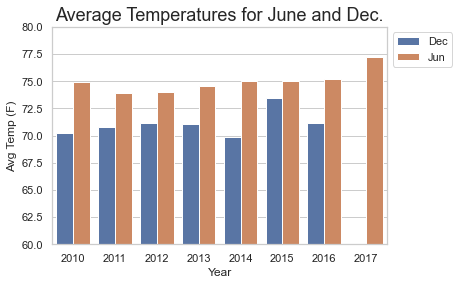

In [14]:
# Create plot of average temps in June and Dec
sns.set_theme(style="whitegrid")
sns.barplot(x="Year", y="Avg Temp", hue='Month', data=avg_temp)
plt.ylim(60, 80)
plt.ylabel('Avg Temp (F)')
plt.legend(bbox_to_anchor= (1,1))
plt.title("Average Temperatures for June and Dec.", fontsize = 18)           

# Collect and Visualize Average Temperature Data by Month between 2010 and 2017

In [15]:
# Show average temp data per year by month
temp_all = session.query(Measurement.date, Measurement.tobs).all()
temp_all = pd.DataFrame(temp_all, columns=['date', 'temp'])
temp_all['date'] = pd.to_datetime(temp_all['date'])
temp_all['month'] = temp_all['date'].dt.month_name().str[:3]
temp_all

,date,temp,month
0,2010-01-01,65.0,Jan
1,2010-01-02,63.0,Jan
2,2010-01-03,74.0,Jan
3,2010-01-04,76.0,Jan
4,2010-01-06,73.0,Jan
...,...,...,...
19545,2017-08-19,71.0,Aug
19546,2017-08-20,78.0,Aug
19547,2017-08-21,76.0,Aug
19548,2017-08-22,76.0,Aug


In [16]:
# Group data by average temperature by month
total_avg_temp = temp_all.groupby(['month']).mean()['temp']
# Convert filtered list into a dataframe
total_avg_temp = pd.DataFrame(total_avg_temp)
# Redefine month index into a column
total_avg_temp.reset_index(level=0, inplace=True)
# Rename reset index column to month and calculated average column to Avg Temp
total_avg_temp.rename(columns = {'month':'Month', 'temp':'Avg Temp'}, inplace = True)
# Define list of months in order for DataFrame sorting
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
# Match values in 'month' list to match Month in DataFrame
total_avg_temp['Month'] = pd.Categorical(total_avg_temp['Month'], categories=months, ordered=True)
# Sort DataFrame by month in correct order based on 'month' list
total_avg_temp = total_avg_temp.sort_values(by="Month")
# # Show new dataframe
total_avg_temp

,Month,Avg Temp
4,Jan,68.726115
3,Feb,69.442236
7,Mar,70.059067
0,Apr,72.357268
8,May,73.680900
6,Jun,74.944118
5,Jul,76.082408
1,Aug,76.412454
11,Sep,76.164865
10,Oct,75.391388


Text(0.5, 1.0, 'Average Monthly Temperatures Between 2010 and 2017')

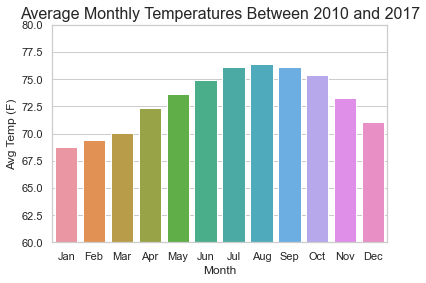

In [17]:
# Plot avg temperature values by month from the database 
import seaborn as sns
sns.set_theme(style="whitegrid")
sns.barplot(x="Month", y="Avg Temp", data=total_avg_temp)
plt.ylim(60, 80)
plt.ylabel('Avg Temp (F)')
plt.title("Average Monthly Temperatures Between 2010 and 2017", fontsize=16)

# Collect the precipitation data 

In [18]:
# Write a query that filters the Measurement table to retrieve the precipitation for the month of June. 
results_june_prcp = session.query(Measurement.date, Measurement.prcp).filter(extract('month', Measurement.date)==6).all()

# Convert the June precipitation to a list.
june_prcp = list(np.ravel(results_june_prcp))

# Create a DataFrame from the list of precipitation for the month of June. 
june_prcp_df = pd.DataFrame(results_june_prcp, columns=['date', 'prcp'])
june_prcp_df['date'] = pd.to_datetime(june_prcp_df['date'])
june_prcp_df

,date,prcp
0,2010-06-01,0.00
1,2010-06-02,0.01
2,2010-06-03,0.00
3,2010-06-04,0.00
4,2010-06-05,0.00
...,...,...
1695,2017-06-26,0.02
1696,2017-06-27,0.10
1697,2017-06-28,0.02
1698,2017-06-29,0.04


In [19]:
# Calculate and print out the summary statistics for the June precipitation DataFrame.
june_prcp_df.describe()

,prcp
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


In [20]:
# Write a query that filters the Measurement table to retrieve the precipitation for the month of December. 
results_dec_prcp = session.query(Measurement.date, Measurement.prcp).filter(extract('month', Measurement.date)==12).all()

# Convert the June temperatures to a list.
dec_prcp = list(np.ravel(results_dec_prcp))

# Create a DataFrame from the list of temperatures for the month of June. 
dec_prcp_df = pd.DataFrame(results_dec_prcp, columns=['date', 'prcp']).dropna()
dec_prcp_df['date'] = pd.to_datetime(dec_prcp_df['date'])
dec_prcp_df

,date,prcp
0,2010-12-01,0.04
1,2010-12-03,0.00
2,2010-12-04,0.00
3,2010-12-06,0.00
4,2010-12-07,0.00
...,...,...
1512,2016-12-27,0.14
1513,2016-12-28,0.14
1514,2016-12-29,1.03
1515,2016-12-30,2.37


In [21]:
dec_prcp_df.describe()

,prcp
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000


# Collect and Visualize Average Precipitation Data for June and December

In [22]:
# Create DataFrame of the average prcp data of June and Dec by year
# Combine June and Dec dataframes into a single dataframe
prcp_data = pd.concat([june_prcp_df, dec_prcp_df],ignore_index=True)
# Convert date column data to datetime format
prcp_data['date'] = pd.to_datetime(prcp_data['date']).dropna()
# Create month column for data labelling
prcp_data['month'] = prcp_data['date'].dt.month_name().str[:3]
# Confirm datatypes of the precipitation dataframe
prcp_data.dtypes
# View new dataframe to confirm format
prcp_data

,date,prcp,month
0,2010-06-01,0.00,Jun
1,2010-06-02,0.01,Jun
2,2010-06-03,0.00,Jun
3,2010-06-04,0.00,Jun
4,2010-06-05,0.00,Jun
...,...,...,...
3100,2016-12-27,0.14,Dec
3101,2016-12-28,0.14,Dec
3102,2016-12-29,1.03,Dec
3103,2016-12-30,2.37,Dec


In [23]:
# Filter precipitation data by month and year and find the mean

avg_prcp = prcp_data.groupby(['month', prcp_data['date'].dt.year]).mean()['prcp']
# Convert filtered list into a dataframe
avg_prcp = pd.DataFrame(avg_prcp)
# Redefine month index into a column
avg_prcp.reset_index(level=0, inplace=True)
# Rename reset index column to month and calculated average column to Avg Prcp
avg_prcp.rename(columns = {'month':'Month', 'prcp':'Avg Prcp'}, inplace = True)
# Reset year index to column
avg_prcp.reset_index(level=0, inplace=True)
# Rename reset index to year
avg_prcp.rename(columns = {'date':'Year'}, inplace = True)
# Show new dataframe
avg_prcp

,Year,Month,Avg Prcp
0,2010,Dec,0.459087
1,2011,Dec,0.201581
2,2012,Dec,0.089604
3,2013,Dec,0.169014
4,2014,Dec,0.188439
5,2015,Dec,0.169506
6,2016,Dec,0.199494
7,2010,Jun,0.042241
8,2011,Jun,0.240142
9,2012,Jun,0.097062


Text(0.5, 1.0, 'Average Precipitation in June and Dec.')

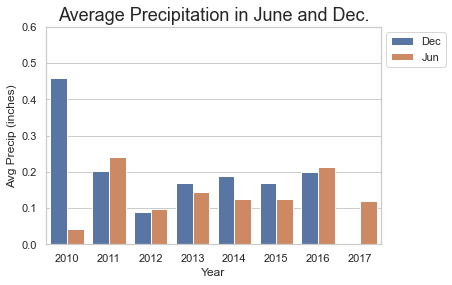

In [24]:
# Create plot of average temps in June and Dec
sns.set_theme(style="whitegrid")
sns.barplot(x="Year", y="Avg Prcp", hue='Month', data=avg_prcp)
plt.ylim(0, .6)
plt.ylabel('Avg Precip (inches)')
plt.legend(bbox_to_anchor= (1,1))
plt.title("Average Precipitation in June and Dec.", fontsize = 18)      

# Collect and Visualize Average Precipitation Data by Month between 2010 and 2017

In [25]:
# Show average temp data per year by month
prcp_all = session.query(Measurement.date, Measurement.prcp).all()
prcp_all = pd.DataFrame(prcp_all, columns=['date', 'prcp']).dropna()
prcp_all['date'] = pd.to_datetime(prcp_all['date'])
prcp_all['month'] = prcp_all['date'].dt.month_name().str[:3]
prcp_all

,date,prcp,month
0,2010-01-01,0.08,Jan
1,2010-01-02,0.00,Jan
2,2010-01-03,0.00,Jan
3,2010-01-04,0.00,Jan
5,2010-01-07,0.06,Jan
...,...,...,...
19543,2017-08-17,0.13,Aug
19545,2017-08-19,0.09,Aug
19547,2017-08-21,0.56,Aug
19548,2017-08-22,0.50,Aug


In [26]:
# Group data by average precipitation by month
total_avg_prcp = prcp_all.groupby(['month']).mean()['prcp']
# Convert filtered list into a dataframe
total_avg_prcp = pd.DataFrame(total_avg_prcp)
# Redefine month index into a column
total_avg_prcp.reset_index(level=0, inplace=True)
# Rename reset index column to month and calculated average column to Avg Prcp
total_avg_prcp.rename(columns = {'month':'Month', 'prcp':'Avg Prcp'}, inplace = True)
# Define list of months in order for DataFrame sorting
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
# Match values in 'month' list to match Month in DataFrame
total_avg_prcp['Month'] = pd.Categorical(total_avg_prcp['Month'], categories=months, ordered=True)
# Sort DataFrame by month in correct order based on 'month' list
total_avg_prcp = total_avg_prcp.sort_values(by="Month")
# # Show new dataframe
total_avg_prcp

,Month,Avg Prcp
4,Jan,0.129975
3,Feb,0.137271
7,Mar,0.204227
0,Apr,0.150639
8,May,0.145677
6,Jun,0.136360
5,Jul,0.167922
1,Aug,0.146662
11,Sep,0.164249
10,Oct,0.155606


Text(0.5, 1.0, 'Average Monthly Precipitation Between 2010 and 2017')

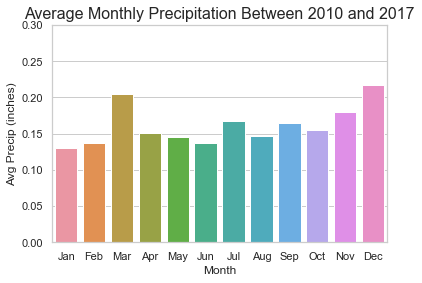

In [27]:
# Plot avg precipication values by month from the database 
import seaborn as sns
sns.set_theme(style="whitegrid")
sns.barplot(x="Month", y="Avg Prcp", data=total_avg_prcp)
plt.ylim(0, .3)
plt.ylabel('Avg Precip (inches)')
plt.title("Average Monthly Precipitation Between 2010 and 2017", fontsize=16)